# <font color=pink>  Enhancing Customer Targeting through RFM Segmentation</font>

## <font color = pink> 1. Business Understanding </font>

As a company, optimizing customer targeting strategies through a campaign is crucial for maximizing ROI and driving revenue growth. With limited resources and varying customer needs, preferences, and purchasing behaviors, identifying high-value segments and tailoring marketing efforts effectively poses a significant challenge. To tackle this obstacle, we intend to implement RFM (Recency, Frequency, Monetary) segmentation to categorize customers based on their transactional behavior. This approach will enable us to develop targeted marketing strategies aimed at increasing engagement, retention, and conversion rates.

### Business Objective
* The company wants to personalize marketing strategies to increase customer retention and maximize revenue with effective marketing spending in the next 3 months
* Company also want to identify high-value customers to give them personalized marketing

### Problem Statement

* How can we effectively segment our customer to better understand customer behavior and implement targeted marketing strategies?

## <font color = pink>2. Modelling Workflow </font>

* Data Preparation
    * Importing data to Python
    * Exploratory data analysis
* Data Pre-processing
    * Missing value handling
    * Normalization
    * Feature engineering: creating RFM
* Clustering Modelling:
    * Option 1: Ranking method
    * Option 2: K-means clustering using Elbow method for evaluation
* In-dept Analysis & Recommendation

## <font color = pink> 3. Example Output from Clustering </font>

#### <font color= green> Best Customers </font>

* General Characteristic (Low recency, high frequency & monetary)
    * Recency : 70 days
    * Frequency : 9 transactions
    * Monetary : $ 2775

#### <font color =green> Average Customers </font>

* General Characteristic (Low recency, medium frequency & monetary)
    * Recency : 77 days
    * Frequency : 4 transactions (specifically 3.7 transactions)
    * Monetary : $ 915

#### <font color = green> At Risk Customers </font>

* General Characteristic (high recency, low frequency & monetary)
    * Recency : 421 days
    * Frequency : 3 transactions (specifically 3.1 transactions)
    * Monetary : $ 761

## <font color = pink> 4. Execution </font>

### Importing data

In [80]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
data = pd.read_csv(r"./retail_uk.csv")
data.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0


#### Data Description

This is e-commerce data from the UK that consist of:

* Invoice: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* Price: Unit price. Numeric, Product price per unit in sterling.
* Customer ID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.


In [3]:
# Read data
data.shape

(744322, 8)

In [4]:
# check data duplicate
data.duplicated().sum()

0

there is no duplicate

In [5]:
# check data type
data.dtypes

Unnamed: 0       int64
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
dtype: object

We know that:

* InvoiceDate is a time series data, change the data type to time series

In [6]:
# change the data types for InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
# validate the data types
data.dtypes

Unnamed: 0              int64
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
dtype: object

The data is correct, now we can exploring it!

### Exploratory Data Analysis

Duplicate the data first so we are not overdriving the current data

In [8]:
eda_data = data.copy()

In [9]:
#Validate

print("Original data shape: ", data.shape)
print ("EDA data shape: ",eda_data.shape)

Original data shape:  (744322, 8)
EDA data shape:  (744322, 8)


##### EDA Part 1: Transaction Data

In [10]:
eda_data.describe()

,Unnamed: 0,Quantity,InvoiceDate,Price,Customer ID
count,7.443220e+05,744322.000000,744322,744322.000000,545385.000000
mean,5.091704e+05,7.299923,2010-12-29 01:02:33.634958592,4.834992,15554.020754
min,0.000000e+00,1.000000,2009-12-01 07:45:00,1.010000,12346.000000
25%,2.492408e+05,1.000000,2010-06-28 12:22:00,1.650000,14194.000000
50%,5.062155e+05,2.000000,2010-12-06 09:58:00,2.950000,15549.000000
75%,7.651818e+05,6.000000,2011-07-20 13:26:00,4.950000,16935.000000
max,1.032232e+06,74215.000000,2011-12-09 12:49:00,25111.090000,18287.000000
std,2.986256e+05,90.398635,NaN,55.616134,1589.793537


Summary:
* The Quantity and Price values are always positive
* There are some potential outliers in the data that we have to exclude

In [11]:
#Check missing values

eda_data.isna().sum()

Unnamed: 0          0
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    198937
dtype: int64

In [12]:
#Customer ID has many missing values, let's take a look at it

eda_data[eda_data['Customer ID'].isna()]

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
704,1027,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN
705,1028,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN
706,1029,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN
707,1030,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN
708,1031,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2,2009-12-01 12:32:00,1.95,NaN
...,...,...,...,...,...,...,...,...
744135,1031882,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN
744136,1031883,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN
744137,1031884,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN
744138,1031885,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN


* We know that each transaction are tied to Customer ID and that we have to aggregate the whole transaction data by it.
* Transaction without Customer ID are not useful, hence we have to drop it

In [13]:
#Shape before dropping
print("Shape before dropping: ", eda_data.shape)

#dropping the null values
eda_data = eda_data[~eda_data['Customer ID'].isna()]

#Shape after dropping
print("Shape after dropping: ", eda_data.shape)



Shape before dropping:  (744322, 8)
Shape after dropping:  (545385, 8)


In [14]:
#Validate
eda_data.isna().sum()

Unnamed: 0     0
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64

In [15]:
#Check for Invoice

eda_data[eda_data['Invoice'].duplicated()]

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0
5,5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0
...,...,...,...,...,...,...,...,...
744316,1032226,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0
744317,1032228,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0
744319,1032230,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0
744320,1032231,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0


In [16]:
#Check the duplication of Invoice and InvoiceDate

eda_data[eda_data[['Invoice','InvoiceDate']].duplicated()]

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0
5,5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0
...,...,...,...,...,...,...,...,...
744316,1032226,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0
744317,1032228,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0
744319,1032230,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0
744320,1032231,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0


All the duplicated Invoice are coming from one transcation but with multitple items

Now count the number of unique invoice

In [17]:
eda_data['Invoice'].nunique()

32831

There are 32K transactions in the data

Check for CustomerID

In [18]:
#number of unique customer ID

eda_data['Customer ID'].nunique()

5298

In [19]:
#Check Invoice Data

print('The first transaction: ', eda_data['InvoiceDate'].min())
print('The most current transaction: ', eda_data['InvoiceDate'].max())

The first transaction:  2009-12-01 07:45:00
The most current transaction:  2011-12-09 12:49:00


We have 3 years data from Dec 2009 to Dec 2011

Create RFM Feature

First, set the current date. 
Because the last transaction happened in 2011-12-09, let's set the current date as 2011-12-1 (1 week after)

In [20]:
# Set the reference date

LATEST_DATE = pd.to_datetime('2011-12-15')
LATEST_DATE

Timestamp('2011-12-15 00:00:00')

After that, we can create RFM Features

* Recency (R)
Recency refers to the time elapsed since a customer's last interaction or transaction with a company. It measures how recently a customer has engaged with the business

* Frequency (F)
Frequency represents the number of transaction occurs. It measures how often a customer engages with the business.

* Monetary (M)
Monetary refers to the total monetary value of a customer's transactions or purchases.

* Tenure (T)
The length of time a customer remains a customer until the latest date

In [21]:
#Define the relevan functions

def calculate_recency(x):
    """Calculate the recency (days) based on the reference date"""
    return (LATEST_DATE - x.max()).days

def calculate_tenure(x):
    """calculate tenure(days) based on the reference date"""
    return (x.max() - x.min()).days

def calculate_frequency(x):
    """calculate the frequence based on the latest date"""
    return(x.nunique())

def generate_rfmts(data):
    """
    function to generate the RFM + TS data
    
    parameter
    --------
    data: pandas dataframe
          the sample data

    return
    ------
    rmfts_data : pandas dataframe
    
    """
    # 1. Create sales data ---> sales = quantity * price
    data['Sales'] = data['Quantity'] * data['Price']

    #2. Groupby CustomerID to generate RFM + TS data
    agg_dict = {
        'InvoiceDate': [calculate_recency, calculate_tenure],
        'Invoice' : calculate_frequency,
        'Sales' : 'sum'
    }

    data_rfmts = data.groupby('Customer ID').agg(agg_dict)

    #3. Rename columns
    data_rfmts.columns = ['Recency','Tenure','Frequency','Monetary']

    #4. Change index type
    data_rfmts.index = data_rfmts.index.astype('int')

    return data_rfmts

In [22]:
eda_rfm_data = generate_rfmts(data = eda_data)

#Validate
#rows of eda_data = number of unique customer ID
print ('RFM data shape: ', eda_rfm_data.shape)
assert eda_rfm_data.shape[0] == eda_data['Customer ID'].nunique()


RFM data shape:  (5298, 4)


Summary, the data is valis as the number of rows in RFM data is equal to number of unique Customer ID

In [23]:
#Sanity check

eda_rfm_data.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346,330,400,11,77555.46
12608,409,0,1,311.89
12745,491,87,2,634.57
12746,545,0,1,254.55
12747,7,730,26,8819.08


EDA Part 2: RFM Data

Check for data descriptions

In [24]:
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,5298.000000,5298.000000,5298.000000,5298.000000
mean,207.407512,275.251038,6.196867,2346.870449
std,209.853264,259.453367,11.641145,10654.649297
min,5.000000,0.000000,1.000000,2.950000
25%,30.000000,0.000000,1.000000,285.822500
50%,103.500000,226.000000,3.000000,720.950000
75%,386.000000,514.000000,7.000000,1885.502500
max,743.000000,738.000000,316.000000,554324.810000


Summary:

* There is no negative value in Recency, Tenure, Frequency, and Monetary
* All variables are valid
* There is an oddlu high number in Frequency and Monetary. We need to inspect that

Check for Frequency

In [25]:
#checking the distribution of the frequency
eda_rfm_data.groupby('Frequency').size().sort_values(ascending=False)

Frequency
1      1461
2       849
3       606
4       427
5       333
       ... 
58        1
52        1
48        1
45        1
316       1
Length: 82, dtype: int64

There are many one time buyer (Frequency = 1)

* Now check the customer with tenure = 0
* We want to know is there any customer with tenure = 0 but frequency > 1

In [26]:
eda_rfm_data[(eda_rfm_data['Tenure']== 0) & (eda_rfm_data['Frequency']>1)].head(10)

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
13526,743,0,2,119.20
13646,404,0,2,325.40
13776,433,0,2,623.98
14010,570,0,2,423.40
14028,555,0,3,10396.50
14308,554,0,2,1147.02
14663,435,0,2,356.15
14697,223,0,2,116.05
14736,490,0,2,351.27


In [27]:
#taking a look at example how customer is having tenure 0
# but also a repeater (not buying one time only)
eda_data[eda_data['Customer ID']== 13526]

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Sales
827,1228,489560,85208,SET/12 FUNKY FELT FLOWER PEG IN BAG,1,2009-12-01 12:56:00,2.10,13526.0,2.10
828,1236,489560,90125A,PINK BERTIE GLASS BEAD BAG CHARM,12,2009-12-01 12:56:00,2.10,13526.0,25.20
829,1237,489560,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2009-12-01 12:56:00,3.75,13526.0,3.75
830,1238,489560,84901,BLACK FACE LAMB WITH PANTS,1,2009-12-01 12:56:00,3.75,13526.0,3.75
831,1239,489560,84327A,PINK JUMPER LARRY THE LAMB,3,2009-12-01 12:56:00,2.10,13526.0,6.30
876,1330,489564,90125C,TURQUOISE BERTIE GLASS BEAD CHARM,12,2009-12-01 13:13:00,2.10,13526.0,25.20
877,1331,489564,90125D,PURPLE BERTIE GLASS BEAD BAG CHARM,12,2009-12-01 13:13:00,2.10,13526.0,25.20
878,1332,489564,90214H,"LETTER ""H"" BLING KEY RING",2,2009-12-01 13:13:00,1.25,13526.0,2.50
879,1333,489564,90125A,PINK BERTIE GLASS BEAD BAG CHARM,12,2009-12-01 13:13:00,2.10,13526.0,25.20


In [28]:
#Check for Monetary

eda_rfm_data[eda_rfm_data['Frequency']==1]['Monetary'].describe()

count     1461.000000
mean       269.954791
std        410.599124
min          2.950000
25%        113.300000
50%        183.600000
75%        314.090000
max      10953.500000
Name: Monetary, dtype: float64

There are some outlier from the data

Summary:
* As we have limited resources, marketers' interest are usually the repeaters (non one-time purchaser)
* Therefore, we exclude the customer with Frequency < 2 

In [29]:
#Filter data
eda_rfm_data = eda_rfm_data[eda_rfm_data['Frequency']>=2]

#Validate
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,3837.000000,3837.000000,3837.000000,3837.000000
mean,148.633307,380.057336,8.175658,3137.689781
std,169.467535,230.459591,13.150167,12426.800642
min,5.000000,0.000000,2.000000,16.700000
25%,23.000000,169.000000,3.000000,571.600000
50%,65.000000,385.000000,5.000000,1153.760000
75%,237.000000,591.000000,9.000000,2683.120000
max,743.000000,738.000000,316.000000,554324.810000


Data Distribution



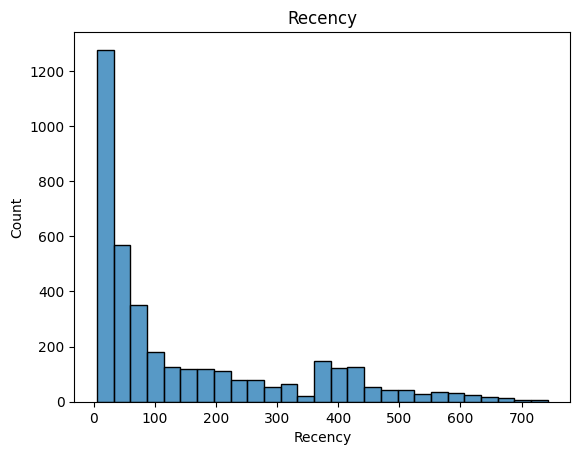

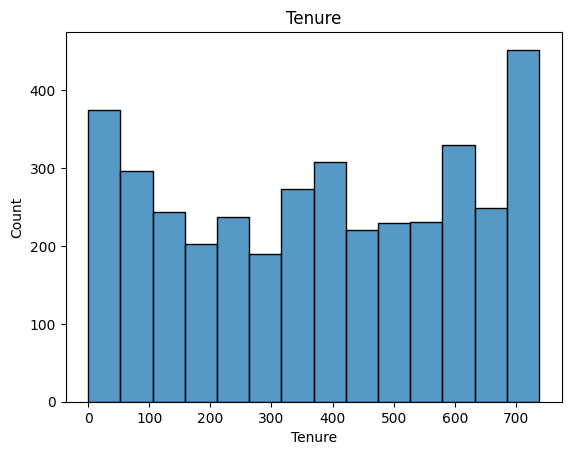

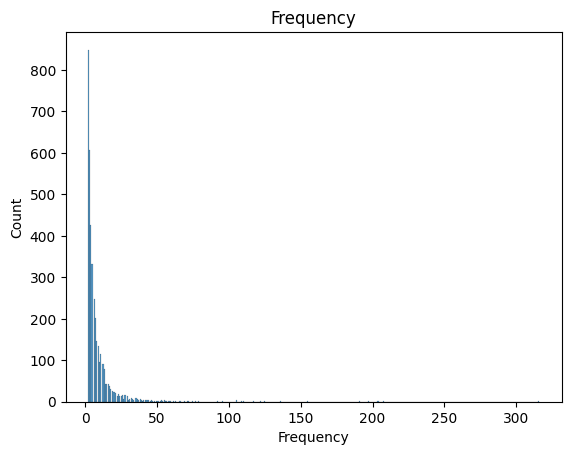

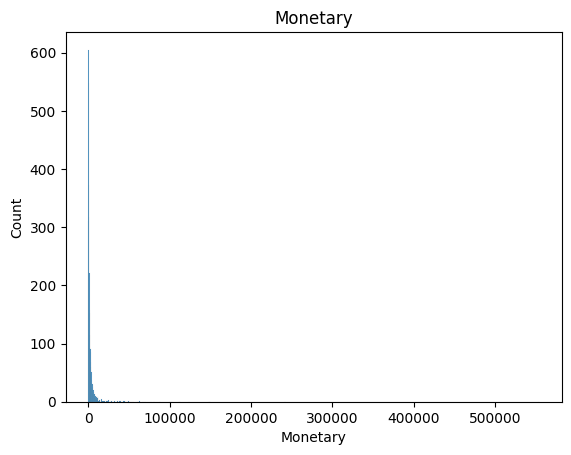

In [30]:
#Let's plot the data distribution

for col in eda_rfm_data.columns:
    x = eda_rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

Summary
* The Monetary and Frequency data are highly skewed
* We need to filter the outlier using IQR

In [31]:
#Drop the outlier

def drop_outlier(data, cols):
    """
    Function to drop outliers by IQR

    Parameters
    --------
    data: pandas dataframe
    cols: list

    Return
    ------
    data_clean = pandas dataframe

    """
    #copy data
    data_clean = data.copy()

    #Iterate
    for col in cols:
        #Find IQR
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3-q1
        ub = q3 + 1.5*iqr #upperbound
        lb = q1 - 1.5*iqr #lowerbound

        #filter data
        cond_data_1 = data_clean[col] <= ub
        cond_data_2 = data_clean[col] >= lb
        data_clean = data_clean[cond_data_1 & cond_data_2]

    return data_clean

In [32]:
#Remove outlier

eda_rfm_data = drop_outlier(data = eda_rfm_data,
                            cols = ['Monetary','Frequency'])

#Validate
print ('EDA data shape: ', eda_rfm_data.shape)
eda_rfm_data.describe()


EDA data shape:  (3251, 4)


,Recency,Tenure,Frequency,Monetary
count,3251.000000,3251.000000,3251.000000,3251.000000
mean,166.233774,337.627192,4.854199,1308.089809
std,173.956377,216.452634,2.964347,1115.017926
min,5.000000,0.000000,2.000000,16.700000
25%,29.000000,140.000000,2.000000,509.805000
50%,80.000000,351.000000,4.000000,936.660000
75%,273.000000,523.000000,6.000000,1749.415000
max,743.000000,736.000000,13.000000,5846.850000


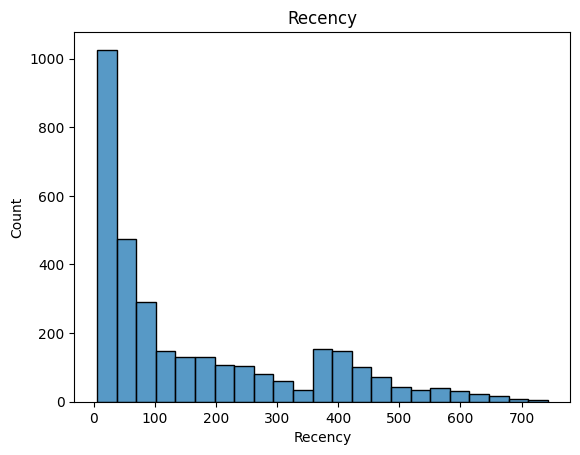

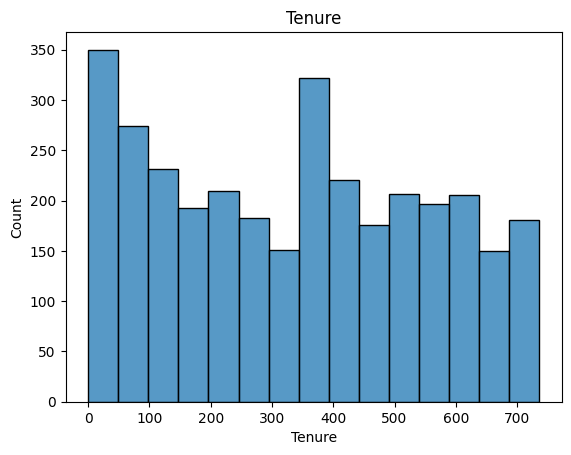

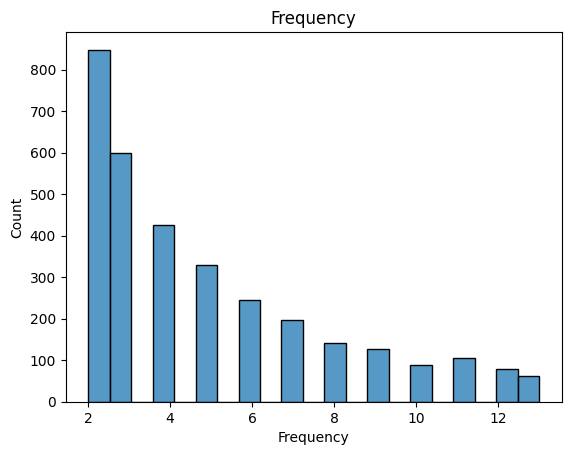

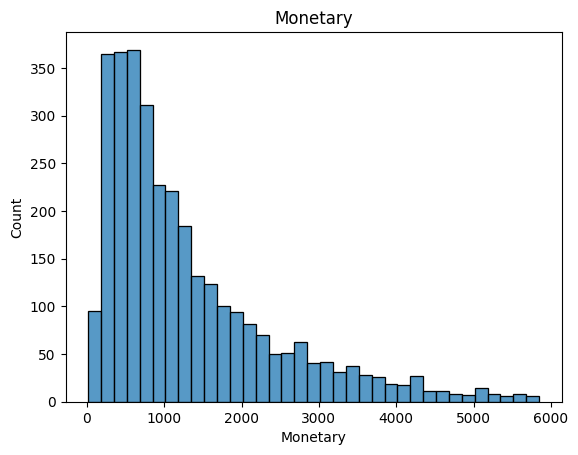

In [33]:
for col in eda_rfm_data.columns:
    x = eda_rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

## Data Preprocessing

The preprocess data is following the plan from previous EDA

1. Remove missing value from Customer ID
2. Convert data to RFM + TS data
3. Remove Frequency < 2
4. Remove Monetary and Frequency outlier
5. Normalize the data (using Min-Max)

To do that, we create several functions

#### Preprocess Raw Data

In [34]:
def preprocess_raw(data):
    """
    Function to preprocess the raw data to RFM data

    Parameters
    ----------
    data: pandas dataframe

    Returns
    -------
    data_rfm : pandas dataframe
    
    """

    #1. Remove missing Customer ID
    data_raw = data[~data['Customer ID'].isna()]

    #2. Create RFM data

    data_rfm = generate_rfmts(data = data_raw)

    #Validate RFM data
    print('Print data shape: ', data_rfm.shape)
    assert data_rfm.shape[0] == data_raw['Customer ID'].nunique()

    return data_rfm

In [35]:
#Get the RFM data
data_rfm = preprocess_raw(data = eda_data)

data_rfm.head()

Print data shape:  (5298, 4)


,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346,330,400,11,77555.46
12608,409,0,1,311.89
12745,491,87,2,634.57
12746,545,0,1,254.55
12747,7,730,26,8819.08


#### Preprocess RFM Data

In [36]:
def preprocess_rfm(data_rfm):
    """
    Function to clean the RFM data
    
    Parameters
    ----------
    data_rfm: pandas DataFrame

    Returns
    -------
    data_clean: pandas DataFrame
    
    """
    #1. Filter the Frequency
    data_freq = data_rfm[data_rfm['Frequency']>=2]

    #2. Remove outlier
    data_clean = drop_outlier(data = data_freq,
                              cols =['Monetary', 'Frequency'])
    
    #3. Filter ata
    data_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

    #Validate
    print('Data shape: ', data_clean.shape)

    return data_clean

In [37]:
#Get the clean RFM data
data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)

data_rfm_clean.describe()

Data shape:  (3251, 3)


,Recency,Frequency,Monetary
count,3251.000000,3251.000000,3251.000000
mean,166.233774,4.854199,1308.089809
std,173.956377,2.964347,1115.017926
min,5.000000,2.000000,16.700000
25%,29.000000,2.000000,509.805000
50%,80.000000,4.000000,936.660000
75%,273.000000,6.000000,1749.415000
max,743.000000,13.000000,5846.850000


At this stage we have:
1. Repeaters customer only
2. No outliers

### Normalize Data

Why we need to normalize data in clustering K-Means?

* K-Means algorithm uses Euclidean distance that is highly prone to irregularities in the size of various features
* Normalize data before K-Means to handle feature size differences and improve clustering accuracy.

Why MinMaxScaler instead standardization?
we can use this simple questions to determine which of the scaling method we'll use.

1. What is your data distribution?
2. Is your data free from outliers?
3. Does your data have to be transformed within a certain range?

Answer:

1. If the answer is normal, use standardization, otherwise use min-max. Our data isn't normal --> minmaxscaler
2. if the answer has no outliers (we have removed them), use the min-max scaler (because standardization transform the outliers)
3. If the answer is no, we can use standardization or minmax, because min-max is transformed in the range [0, 1], for standardization the range can be different.

In [38]:
#Fit & Transform scaler

from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data: pandas DataFrame

    Returns
    -------
    scaler: object

    """
    #Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler

def transform_scaler(data,scaler):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data: pandas DataFrame
    scaler: object

    Returns
    -------
    data_clean: object

    """

    #Transform scaler
    data_clean = pd.DataFrame(scaler.transform(data))
    data_clean.index = data.index
    data_clean.columns = data.columns

    #Validate
    print('Data shape: ', data.shape)

    return data_clean

In [39]:
#Fit a scaler
scaler = fit_scaler(data= data_rfm_clean)

#Transform data
data_rfm_scaled = transform_scaler(data = data_rfm_clean,
                                   scaler = scaler)

data_rfm_scaled.head()

Data shape:  (3251, 3)


,Recency,Frequency,Monetary
Customer ID,,,
12745,0.658537,0.000000,0.105978
12820,0.004065,0.818182,0.359685
12821,0.289973,0.000000,0.023584
12822,0.094851,0.000000,0.135581
12825,0.705962,0.000000,0.082593


In [40]:
data_rfm_scaled.describe()

,Recency,Frequency,Monetary
count,3251.000000,3251.000000,3251.000000
mean,0.218474,0.259473,0.221502
std,0.235713,0.269486,0.191250
min,0.000000,0.000000,0.000000
25%,0.032520,0.000000,0.084578
50%,0.101626,0.181818,0.157794
75%,0.363144,0.363636,0.297199
max,1.000000,1.000000,1.000000


We can see that the min-max scaling bound the value between 0-1

#### Create preprocessing pipeline

In [41]:
def preprocess_data(data, scaler=None):
    """
    Function to preprocess the whole data

    Parameters
    ----------
    data : pandas DataFrame
        The raw sample data

    scaler : object, defatult=None
        The min-max scaler

    Returns
    -------
    data_clean : pandas DataFrame
        The clean data
    """
    # 1. Get the RFM data
    data_rfm = preprocess_raw(data = data)

    # 2. Get the clean RFM data
    data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)

    # 3. Normalize data
    if scaler is None:
        # Create a scaler
        scaler = fit_scaler(data = data_rfm_clean)

    data_clean = transform_scaler(data = data_rfm_clean,
                                  scaler = scaler)

    # 4. Validate
    print('Data shape clean :', data_clean.shape)

    return data_clean, scaler

In [42]:
data_clean, scaler = preprocess_data(data = data)

Print data shape:  (5298, 4)
Data shape:  (3251, 3)
Data shape:  (3251, 3)
Data shape clean : (3251, 3)


In [43]:
data_clean.describe()

,Recency,Frequency,Monetary
count,3251.000000,3251.000000,3251.000000
mean,0.218474,0.259473,0.221502
std,0.235713,0.269486,0.191250
min,0.000000,0.000000,0.000000
25%,0.032520,0.000000,0.084578
50%,0.101626,0.181818,0.157794
75%,0.363144,0.363636,0.297199
max,1.000000,1.000000,1.000000


### Clustering

We use two approach:
1. Ranking method
2. K-means clustering

#### Rangking Method

In [44]:
#Copy data

data_bin = data_clean.copy()

* We will bin our data into 5 bin (ranking)
* Why 5? to explain this, we can assume that the company can only afford to give marketing initiative for 5 clusters
* There's no explisit way to determine how many bin is needed in this case, but we can refer to how many cluster the business can afford
* So we can determine our bin base on the business resources and needs
* This mehtod is commonly performed using the Arthur Hughes method, which bins each of the three RFM attributes independently into five equal frequency bins

In [45]:
def binning_rfm(df):
    """
    Function for binning the data for making ranking method

    Parameter
    ---------
    df: pandas DataFrame
        dataframe input for binning method

    Return
    ------
    df: pandas dataframe
        output binned dataframe
    """

    #Calculate quantiles for each variable
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    #Create bins for each variable
    r_bins = [-np.inf] + list(quantiles['Recency']) + [np.inf]
    f_bins = [-np.inf] + list(quantiles['Frequency']) + [np.inf]
    m_bins = [-np.inf] + list(quantiles['Monetary']) + [np.inf]

    #Create labels for the bins
    labels = [1, 2, 3, 4, 5]

    #Label for recency (using different logic as lower recency have higher ranking)
    labels_r = [5, 4, 3, 2, 1]

    #Bin each variable into five groups
    df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['Frequency'], bins=f_bins, labels = labels).astype(int)
    df['M_Group'] = pd.cut(df['Monetary'], bins=m_bins, labels=labels).astype(int)

    #RFM score with average
    df['RFM_Score'] = np.round((df['R_Group'] + df['F_Group'] + df['M_Group'])/3,2)

    return df

Note,

* The bins include negative infinity as the lowest bin edge, followed by the quantile values, and positive infinity as the highest bin edge.
* We set different labels for recency, because lower recency is better (e.g., rank 5) and higher renceny is worst (e.g., rank 1)
* We calculate RFM score as average of Recency, Frequency, and Monetary ranking

In [46]:
#Bin the data
data_bin = binning_rfm(data_bin)

In [47]:
#Check the data
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
Customer ID,,,,,,,
12745,0.658537,0.000000,0.105978,1,1,2,1.33
12820,0.004065,0.818182,0.359685,5,5,5,5.00
12821,0.289973,0.000000,0.023584,2,1,1,1.33
12822,0.094851,0.000000,0.135581,3,1,3,2.33
12825,0.705962,0.000000,0.082593,1,1,2,1.33


In [48]:
#Check the data type
data_bin.dtypes

Recency      float64
Frequency    float64
Monetary     float64
R_Group        int64
F_Group        int64
M_Group        int64
RFM_Score    float64
dtype: object

* We need to check data types to make sure there's no categorical data type
* All data types are correct

In [49]:
#Check descriptive stats

data_bin.describe()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
count,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000
mean,0.218474,0.259473,0.221502,3.013227,2.801292,2.999385,2.937887
std,0.235713,0.269486,0.191250,1.424449,1.437908,1.414649,1.131821
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.032520,0.000000,0.084578,2.000000,1.000000,2.000000,2.000000
50%,0.101626,0.181818,0.157794,3.000000,3.000000,3.000000,3.000000
75%,0.363144,0.363636,0.297199,4.000000,4.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


We want to assign segment
* For RFM score 0-1 will be assigned as <font color= green>High Potential Churn</font>
* For RFM score 1-2 will be assigned as <font color= green>At Risk Customers</font>
* For RFM score 2-3 will be assigned as <font color= green>Potential Customers</font>
* For RFM score 3-4 will be assigned as <font color= green>Loyal Customers</font>
* For RFM score 4-5 will be assigned as <font color= green>Best Customers</font>

In [50]:
def assign_segment(rfm_df):
    """
    Function to assign RFM_score to segment

    Parameter
    --------
    rfm_df : pandas dataframe
            preprocessed and binned rfm dataframe

    Returns
    -------
    rfm_df : pandas dataframe
            dataframe with segment labels
    
    """
    #Assgin segment name
    labels = ['High Potential Churn', 'At Risk Customer','Potential Customer',
              'Loyal Customer','Best Customer']
    rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                               bins = [0, 1, 2, 3, 4, 5],
                               labels = labels)
    
    return rfm_df

In [51]:
#Create label
data_bin = assign_segment(data_bin)

In [52]:
#Check the data
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer ID,,,,,,,,
12745,0.658537,0.000000,0.105978,1,1,2,1.33,At Risk Customer
12820,0.004065,0.818182,0.359685,5,5,5,5.00,Best Customer
12821,0.289973,0.000000,0.023584,2,1,1,1.33,At Risk Customer
12822,0.094851,0.000000,0.135581,3,1,3,2.33,Potential Customer
12825,0.705962,0.000000,0.082593,1,1,2,1.33,At Risk Customer


In [53]:
#Check data bin with RFM score > 4
data_bin[data_bin['RFM_Score']>4]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer ID,,,,,,,,
12820,0.004065,0.818182,0.359685,5,5,5,5.00,Best Customer
12826,0.002710,0.909091,0.398794,5,5,5,5.00,Best Customer
12838,0.044715,0.727273,0.446138,4,5,5,4.67,Best Customer
12849,0.042005,0.363636,0.399935,4,4,5,4.33,Best Customer
12856,0.009485,0.363636,0.345096,5,4,4,4.33,Best Customer
...,...,...,...,...,...,...,...,...
18242,0.097561,0.545455,0.541206,3,5,5,4.33,Best Customer
18257,0.052846,0.909091,0.715807,4,5,5,4.67,Best Customer
18259,0.032520,0.454545,0.649486,4,4,5,4.33,Best Customer


In [54]:
#Check data bin with RFM Score 3-4
data_bin[(data_bin['RFM_Score']>3) & (data_bin['RFM_Score']<=4)]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer ID,,,,,,,,
12828,0.002710,0.363636,0.158944,5,4,3,4.00,Loyal Customer
12830,0.123306,0.272727,0.560744,3,3,5,3.67,Loyal Customer
12840,0.193767,0.454545,0.660818,2,4,5,3.67,Loyal Customer
12842,0.094851,0.181818,0.304814,3,3,4,3.33,Loyal Customer
12853,0.181572,0.818182,0.609212,2,5,5,4.00,Loyal Customer
...,...,...,...,...,...,...,...,...
18237,0.002710,0.272727,0.150988,5,3,3,3.67,Loyal Customer
18239,0.295393,0.363636,0.266676,2,4,4,3.33,Loyal Customer
18252,0.067751,0.454545,0.213622,4,4,4,4.00,Loyal Customer


* Let's plot using boxplot to see each cluster characteristics
* Then, we can plot each pair of RFM variables using scatterplot with Hue segment

In [55]:
# Inverse transform data_bin
for col in ['Recency', 'Frequency', 'Monetary']:
    # inverse transform X
    x = data_bin[col]

    # Find index
    idx = scaler.feature_names_in_.tolist().index(col)
    max_val = scaler.data_max_[idx]
    min_val = scaler.data_min_[idx]

    # Inverse transform
    data_bin[col] = x*(max_val-min_val) + min_val

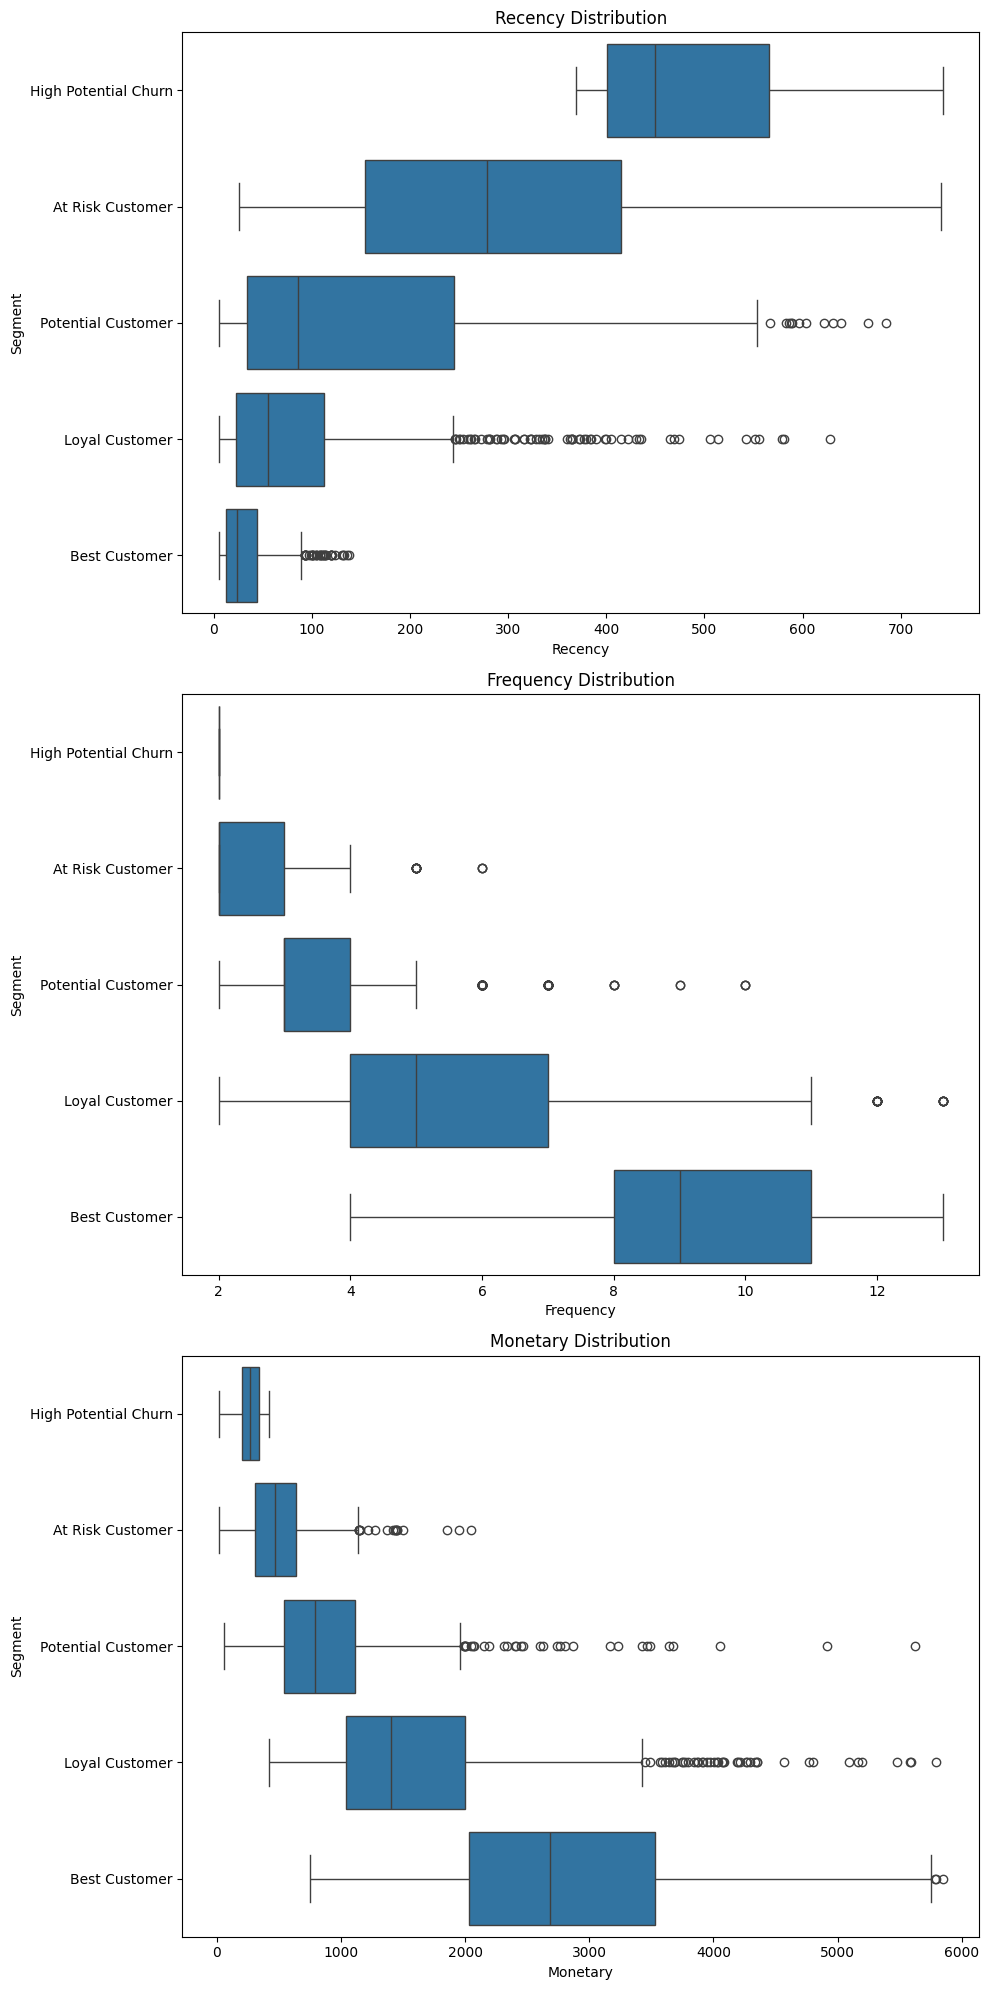

In [56]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = data_bin,
                y = 'Segment',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [57]:
# groupby to get aggregate mean of each RFM variable
data_bin.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean'}).round(2)

,Recency,Frequency,Monetary
Segment,,,
High Potential Churn,484.53,2.00,266.74
At Risk Customer,291.12,2.47,506.68
Potential Customer,156.16,3.59,889.55
Loyal Customer,89.98,5.88,1661.66
Best Customer,33.25,9.39,2839.96


<font color = green> Best Customers </font>

Characteristic:

* low recency, high frequency, and high monetary value
* Recency: 33 days
* Frequency: 9 transactions
* Monetary: $ 2839

Marketing initiative:

* Provide dedicated account managers or personalized support to cater to their specific needs
* Offer personalized product recommendations based on their past purchases

<font color = green>Loyal Customers</font>

Characteristic:

* medium recency, medium frequency, and high monetary value
* Recency: 89 days
* Frequency: 6 transactions
* Monetary: $ 1661

Marketing initiative:

* Implement a customer loyalty program with tiered rewards and exclusive benefits
* Provide referral incentives to encourage them to refer friends and family to your business

<font color = green>Potential Customers</font>

Characteristic:

* medium recency, medium frequency, and medium monetary
* Recency: 156 days
* Frequency: 3 transactions
* Monetary: $ 889

Marketing initiative:

* Offer free trials, demos, or introductory discounts to encourage them to try your products or services

<font color = green>At Risk Customers</font>

Characteristic:

* high recency, low monetary, and low frequency
* Recency: 291 days
* Frequency: 3 transactions
* Monetary: $ 506

Marketing initiative:

* Conduct customer satisfaction surveys to identify and address any issues that may be causing their dissatisfaction
* Use discount promotional campaign to attract them make transaction

<font color = green>High Potential Churn</font>

Characteristic:

* high recency, low frequency, and low monetary
* Recency: 484 days
* Frequency: 2 transactions
* Monetary: $ 486

Marketing initiative:

* Conduct surveys or feedback campaigns to understand their needs and preferences better
* Implement a proactive customer outreach program to address any concerns or issues they may have

### K-means Clustering

1. Elbow method
2. K-means clustering

In [58]:
#Import package

from sklearn.cluster import KMeans

In [59]:
data_cluster_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

In [60]:
#Set empty list
inertia = []

# iterate for 
for k in range(1,11):
    #Create
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    #Fit object
    kmeans.fit(data_cluster_clean)

    #Append results
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

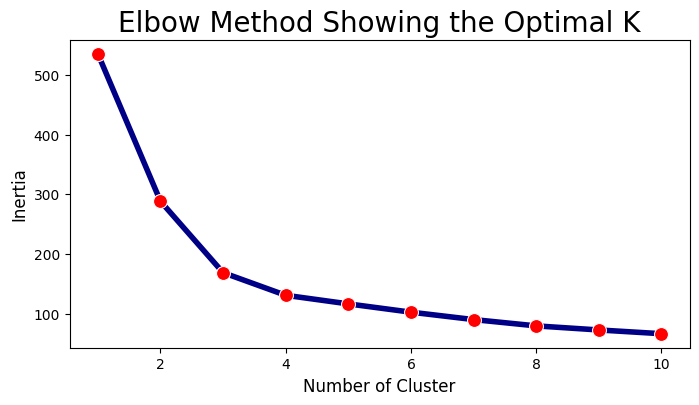

In [61]:
plt.figure(figsize=(8, 4))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

* We can see that there's no 'sharp bending' in the plot
* It's approximately between n_cluster 2 or n_cluster 3
* We don't decide the number of cluster needed based on elbow method only, we should consinder the business needs
* If we decide to cluster into 2 group, there's some drawbacks:
    * Lack of granularity: With only two clusters, your customer segmentation becomes overly simplified, resulting in a lack of granularity. This can make it difficult to target specific customer groups effectively
    * Ineffective messaging: Limited segmentation may lead to generalized marketing messages that do not resonate well with either cluster
* So, we consider to use either n_cluster = 3 or n_cluster = 4, because our budget is still sufficient to cover until 5 clusters (based on assumption in RFM ranking method above)
* We can decide using n_cluster = 3, because we can't see 'beding curve' on n_cluster = 4 and n_cluster = 5

* We want to cluster using K-Means with n_cluster = 3
* Find the centroids coordinate for clusters

In [62]:
# Refit best data
kmeans_best = KMeans(n_clusters = 3,
                     random_state = 42,
                     n_init = 10) # Number of times the k-means algorithm will be run with different initial centroids

# fit
kmeans_best.fit(data_cluster_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [63]:
# Predict
data_label = kmeans_best.predict(data_cluster_clean)
data_label

array([1, 0, 2, ..., 2, 1, 0], dtype=int32)

In [64]:
# Get the coordinates of the centroids
centroids = kmeans_best.cluster_centers_

In [65]:
# create dataframe
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

# show dataframe centroid
centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,0.089001,0.665906,0.473179
1,0.563657,0.097266,0.127725
2,0.097351,0.156479,0.154229


Analysis

* The inverse_transform method is used to reverse or undo this scaling transformation and bring the data back to its original scale or format
* By using inverse_transform, you can obtain the original unscaled values, which can be useful for analysis, visualization, or any other further processing that requires the data to be in its original form.

In [66]:
# Inverse transform data
data_cluster = pd.DataFrame(scaler.inverse_transform(data_clean))
data_cluster.index = data_clean.index
data_cluster.columns = data_clean.columns

# Build data
data_cluster = data_cluster[['Recency', 'Frequency', 'Monetary']]
data_cluster['label'] = data_label
data_cluster.head()

,Recency,Frequency,Monetary,label
Customer ID,,,,
12745,491.0,2.0,634.57,1
12820,8.0,11.0,2113.72,0
12821,219.0,2.0,154.20,2
12822,75.0,2.0,807.16,2
12825,526.0,2.0,498.23,1


In [67]:
# Calculate average values for each RFM_Level, and return a size of each segment
data_cluster.groupby('label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

,Recency,Frequency,Monetary,label
label,,,,
0,70.7,9.3,2775.4,757
1,421.0,3.1,761.4,858
2,76.8,3.7,915.9,1636


* Cluster 0 --> Average Customers
    * Characteristic: low recency, medium frequency & monetary

* Cluster 1 --> At Risk Customers
    * Characteristic: high recency, low frequency & monetary

* Cluster 2 --> Best Customers
    * Characteristic: low recency, high frequency & monetary

We will assign the "Customer Type" label,note, you may got the different result, so check the label customer type with the data

In [68]:
# Function to assign label
def assign_label(val):
    """Function to assign label"""
    if val == 0:
        return 'Best Customer'
    elif val == 1:
        return 'At Risk Customer'
    else:
        return 'Average Customer'

# Create a new column 'Customer_Type' based on 'K_cluster' values
data_cluster['Customer_Type'] = data_cluster['label'].apply(assign_label)

# check result
data_cluster.head()

,Recency,Frequency,Monetary,label,Customer_Type
Customer ID,,,,,
12745,491.0,2.0,634.57,1,At Risk Customer
12820,8.0,11.0,2113.72,0,Best Customer
12821,219.0,2.0,154.20,2,Average Customer
12822,75.0,2.0,807.16,2,Average Customer
12825,526.0,2.0,498.23,1,At Risk Customer


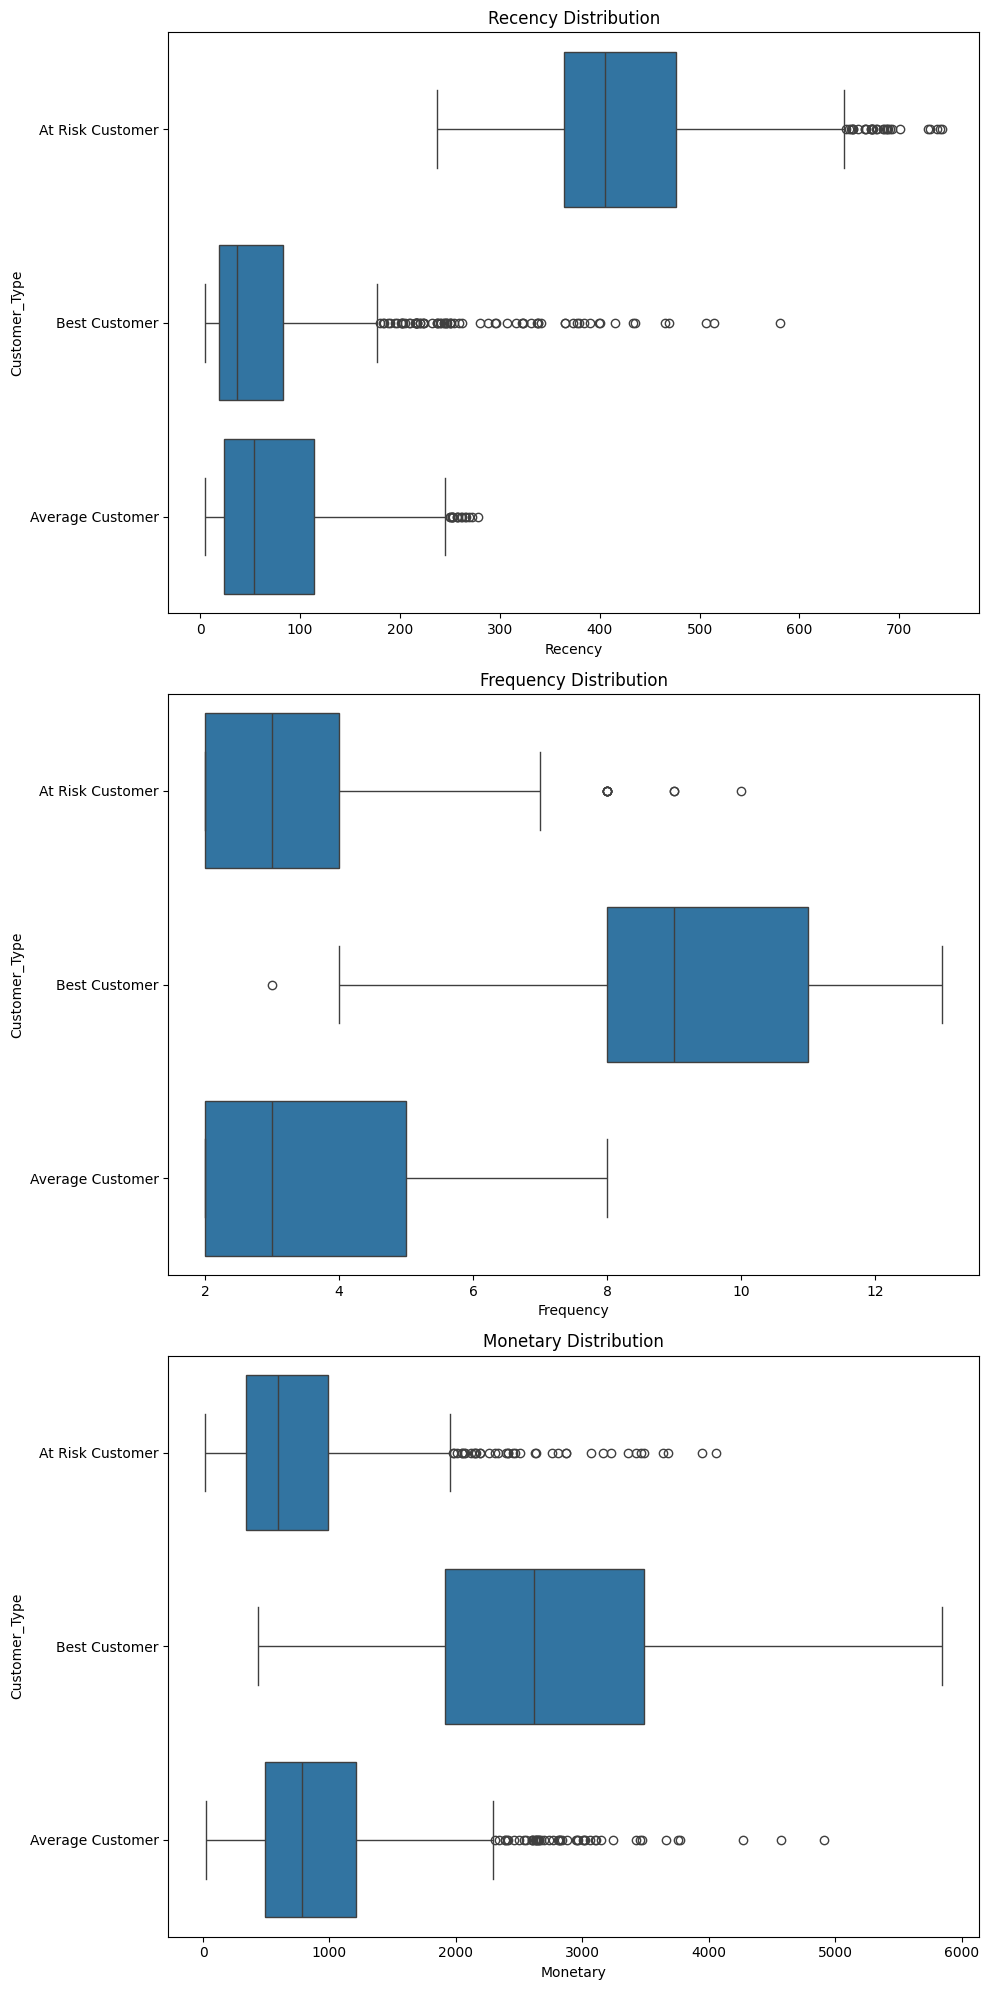

In [69]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = data_cluster,
                y = 'Customer_Type',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

General Recommendation

Best Customers

General Characteristic (Low recency, high frequency & monetary)

Recency : 70 days
Frequency : 9 transactions
Monetary : $ 2775
General marketing initiatives:

Provide dedicated account managers or personalized support to cater to their specific needs
Offer personalized product recommendations based on their past purchases
Implement a customer loyalty program with tiered rewards and exclusive benefits
Average Customers

General Characteristic (Low recency, medium frequency & monetary)
Recency : 77 days
Frequency : 4 transactions (specifically 3.7 transactions)
Monetary : $ 915
General marketing initiatives:
Offer free trials, demos, or introductory discounts to encourage them to try your products or services
At Risk Customers

General Characteristic (high recency, low frequency & monetary)
Recency : 421 days
Frequency : 3 transactions (specifically 3.1 transactions)
Monetary : $ 761
General Marketing initiative:
Conduct surveys or feedback campaigns to understand their needs and preferences better
Implement a proactive customer outreach program to address any concerns or issues they may have
Use discount promotional campaign to attract them make transaction

### In Depth Analysis and Recommendation

In [70]:
# Apply inverse scaling to the data_clean DataFrame
data_clean_ori = pd.DataFrame(scaler.inverse_transform(data_clean))

# Assign he original index to the new dataframe
data_clean_ori.index = data_clean.index

# Assign he original column names to the new DataFrame
data_clean_ori.columns = data_clean.columns

In [71]:
# Show the clean data
data_clean_ori.head()

,Recency,Frequency,Monetary
Customer ID,,,
12745,491.0,2.0,634.57
12820,8.0,11.0,2113.72
12821,219.0,2.0,154.20
12822,75.0,2.0,807.16
12825,526.0,2.0,498.23


#### In Depth Analysis

* We want to know how most customer purchase behavior
* We want to make foundation for specific recommendation based on specific condition and segment

In [72]:
# Show desc statistics
data_clean_ori.describe()

,Recency,Frequency,Monetary
count,3251.000000,3251.000000,3251.000000
mean,166.233774,4.854199,1308.089809
std,173.956377,2.964347,1115.017926
min,5.000000,2.000000,16.700000
25%,29.000000,2.000000,509.805000
50%,80.000000,4.000000,936.660000
75%,273.000000,6.000000,1749.415000
max,743.000000,13.000000,5846.850000


Text(0.5, 1.0, 'Recency Distribution')

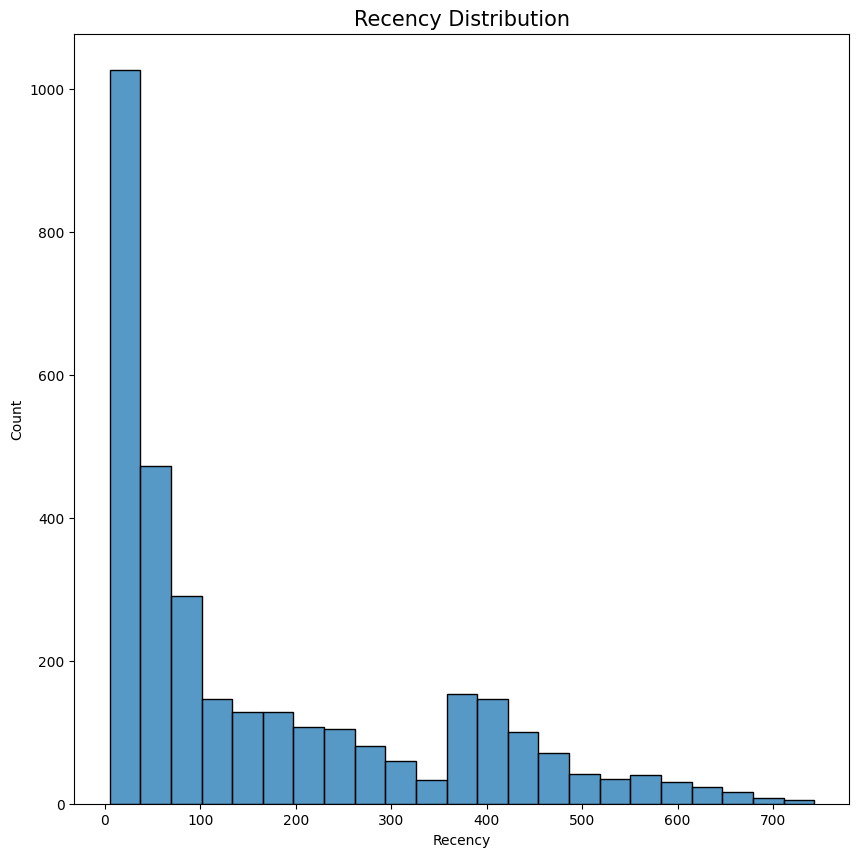

In [73]:
# Plot recency
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Recency'])
plt.title('Recency Distribution', fontsize = 15)

* The majority of customers shop recently
* The highest count is customers who shop less than 10 days ago
* It good for the business, low recency customers are more likely to make transaction when we give them marketing initiative

Text(0.5, 1.0, 'Monetary Distribution')

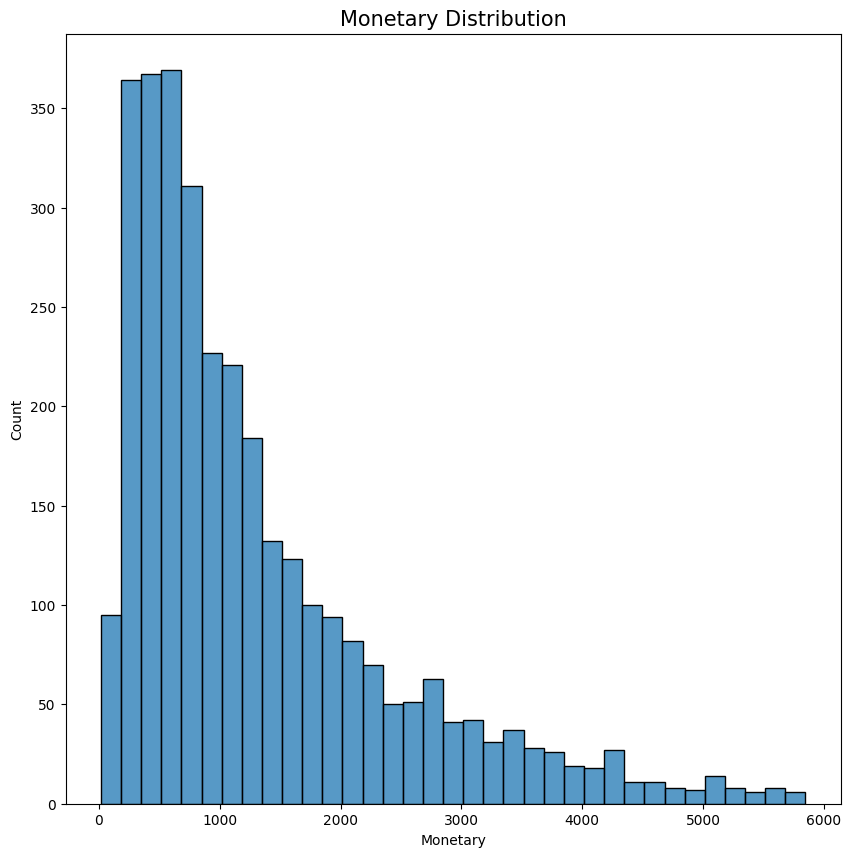

In [74]:
# Plot monetary distribution
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Monetary'])
plt.title('Monetary Distribution', fontsize=15)

* Most customers spend around  $16−$1749 (min - quantile 0.75)
* It's relatively low for 2 year transaction

Text(0.5, 1.0, 'Frequency Distribution')

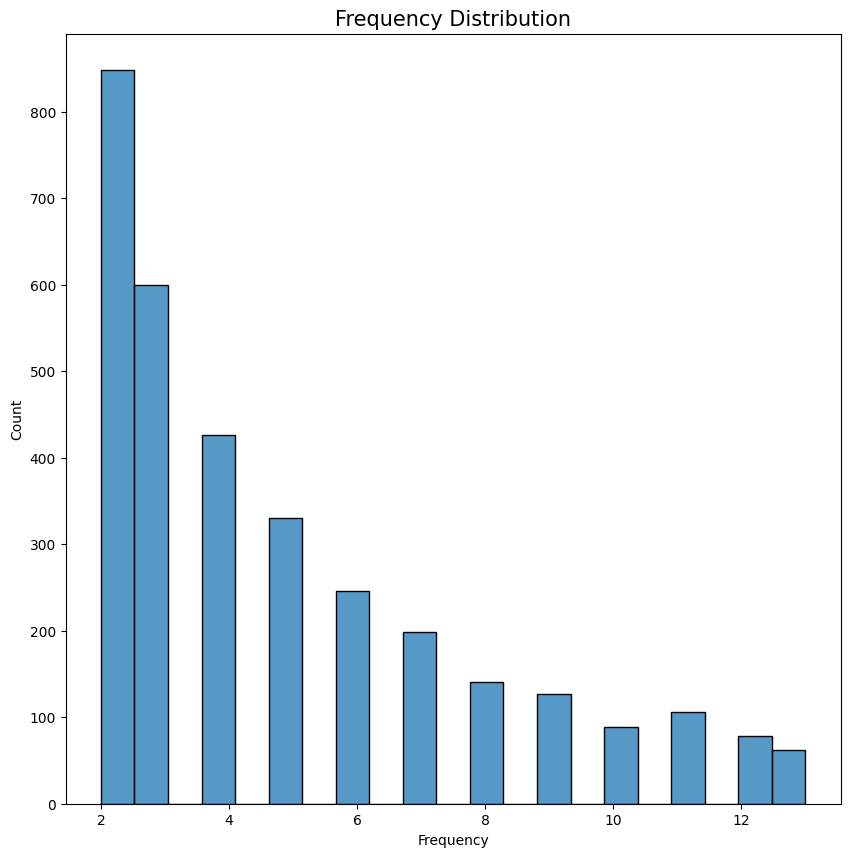

In [75]:
# Plot Frequency
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Frequency'])
plt.title('Frequency Distribution', fontsize=15)

* Most customers spend around 2 - 4 times
* It's relatively low for 2 year transaction

# RFM with actual values

In [76]:

# Show clustered data
data_cluster.head()

,Recency,Frequency,Monetary,label,Customer_Type
Customer ID,,,,,
12745,491.0,2.0,634.57,1,At Risk Customer
12820,8.0,11.0,2113.72,0,Best Customer
12821,219.0,2.0,154.20,2,Average Customer
12822,75.0,2.0,807.16,2,Average Customer
12825,526.0,2.0,498.23,1,At Risk Customer


In [77]:
# Calculate average values for each RFM_level and return a size of each segment
rfm_datas_agg = data_cluster.groupby('Customer_Type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary':'mean',
    'label': 'count'
}).round(1)

#rename
rfm_datas_agg.columns = ['Recency','Frequency','Monetary','Count Customers']

In [78]:
#show data
rfm_datas_agg

,Recency,Frequency,Monetary,Count Customers
Customer_Type,,,,
At Risk Customer,421.0,3.1,761.4,858
Average Customer,76.8,3.7,915.9,1636
Best Customer,70.7,9.3,2775.4,757


In [79]:
# Create percentage reveneu per segments
rfm_datas_agg['pctg revenue'] = np.round(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']/(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']).sum()*100,2)

# Show data
rfm_datas_agg

,Recency,Frequency,Monetary,Count Customers,pctg revenue
Customer_Type,,,,,
At Risk Customer,421.0,3.1,761.4,858,15.36
Average Customer,76.8,3.7,915.9,1636,35.23
Best Customer,70.7,9.3,2775.4,757,49.40


* Most our revenue come from the best customer segment
* In short Term, we can focus to give marketing initiative to best & average customers with several types of promotion: e.g., discount, upselling, cross-selling
* In long term, we need to retail all customers. In simple term, we should know the reason why customer leave/stay with our company, give them loyalty program each segments, and treat the potential churn customer with discount promotion